# 2019-07-08 spyros without fetal cells

In [1]:
import pandas as pd
import numpy as np
import loompy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import matplotlib as mpl
import imp
import sys
sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
import leidenalgorithm_implementation as li
import semiannotate 

In [2]:
# load data
# darmanis brain atlas
BA_count_path = '../leidenalg/Datasets/Darmanis_Brain/All_cell_counts_brain.csv'
BA_counttable = pd.read_csv(BA_count_path,index_col=0)
BA_meta = pd.read_csv('../leidenalg/Datasets/Darmanis_Brain/All_cell_info_brain.csv',sep=';',index_col=0)

#darmanis glioblastoma dataset (to annotate based on brain atlas)
GBM_count_path = '../leidenalg/Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GBM_raw_gene_counts.csv'
GBM_counttable = pd.read_csv(GBM_count_path,sep=' ',index_col=0)
GBM_meta = pd.read_csv('../leidenalg/Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GBM_metadata.csv',sep=' ',index_col=0)
GBMtsne = pd.read_csv('../leidenalg/Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GBM_TSNE.csv',sep=' ',index_col=0)
GBM_meta = GBM_meta.join(GBMtsne)
# add annotation from separate file
GBMmeta2= pd.read_csv('../leidenalg/Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GEO_upload/spyros.darmanis_metadata_GBM.csv',index_col=0)
GBM_meta = GBM_meta.join(GBMmeta2['characteristics: cell type'])
GBM_meta.rename(index=str,columns={'characteristics: cell type':'Cell_type'},inplace=True)

In [6]:
idx_fetal = list(BA_meta[~BA_meta.Cell_type.str.contains('Fetal')].index)
BA_newmeta = BA_meta[BA_meta.index.isin(idx_fetal)].copy()# no fetal cells 
BA_newcounts = BA_counttable[idx_fetal].copy()

In [7]:
imp.reload(li)
keys = ['cell type column','number of features cell type','number of features new data']
values = ['Cell_type',30,500]
kwds = dict(zip(keys,values))
matrix,weights, BA_meta,GBM_meta = li.normmerge_twoCounttables(BA_newcounts,
                                                                             BA_newmeta, GBM_counttable, GBM_meta, **kwds)

-------------------------------------------
genes to be removed from counttable:
['BIVM-ERCC5']
-------------------------------------------
-------------------------------------------
genes to be removed from counttable:
['BIVM-ERCC5', 'ERCC1', 'ERCC2', 'ERCC3', 'ERCC4', 'ERCC5', 'ERCC6', 'ERCC6L', 'ERCC8']
-------------------------------------------
-------------------------------------------
Cell types in atlas:
['Astrocytes' 'Endothelial' 'Microglia' 'Neurons' 'OPC' 'Oligodendrocytes'
 'hybrid' 'hybrids']
-------------------------------------------
Cell types in new data:
['Astocyte' 'Immune cell' 'Neoplastic' 'Neuron' 'OPC' 'Oligodendrocyte'
 'Vascular']
-------------------------------------------


In [8]:
imp.reload(li)
matrix_feature_selected = li.feature_select(matrix.dropna(how='all',axis=1),BA_meta,**kwds)

-------------------------------------------
Selected number of genes from atlas:
240
-------------------------------------------
Selected number of genes from new cells:
500
-------------------------------------------
Combined total of selected genes:
729
-------------------------------------------


In [13]:
imp.reload(li)
keys = ['cell type column','number of features cell type','number of features new data',
        'threshold_neigborhood','n_pcs','resolution_parameter','self_edging']
values = ['Cell_type',30,500,.7,20,.001,False]
kwds = dict(zip(keys,values))
tsnedf, class_numbers,vals,dm,wdm = li.semiAnnotate_to_pca_to_tsnedf(matrix_feature_selected,weights,BA_newmeta,GBM_meta,**kwds)

-------------------------------------------
perfoming weighted PCA
-------------------------------------------
perfoming tSNE
assigned default perplexity of 20
tSNE done.
-------------------------------------------
-------------------------------------------
perfoming UNweighted PCA
-------------------------------------------
perfoming tSNE
tSNE done.
-------------------------------------------


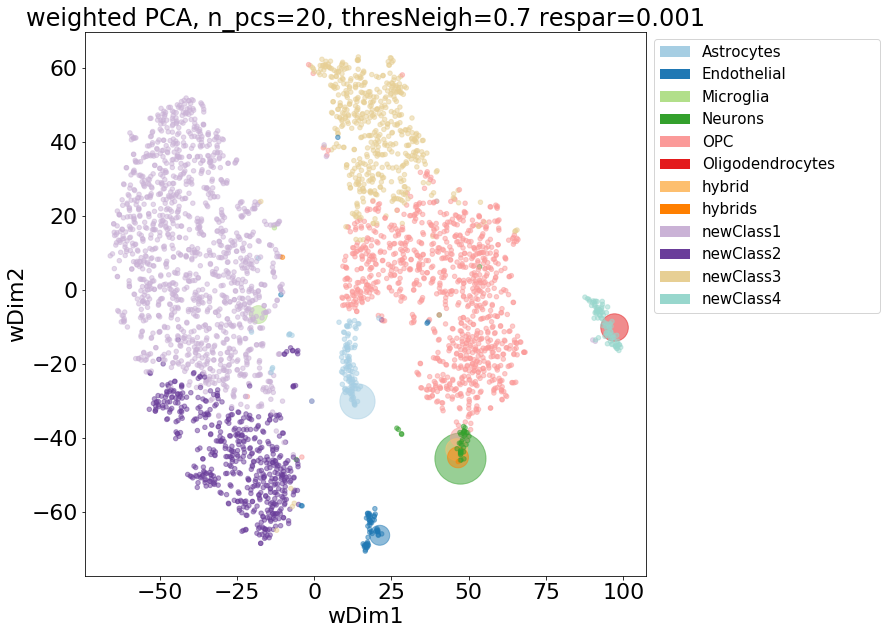

In [14]:
newlut = dict(zip(class_numbers,sns.color_palette('Paired', 10)+sns.color_palette('BrBG',len(class_numbers)-10)))
newcolor = tsnedf['class'].map(newlut)
n_pcs = kwds['n_pcs']
thresn = kwds['threshold_neigborhood']
respar = kwds['resolution_parameter']
f,ax = plt.subplots(figsize=(12,10))
tsnedf.plot.scatter('wDim1','wDim2',s=weights*20
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,vals,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('weighted PCA, n_pcs='+str(n_pcs)+', thresNeigh='+str(thresn)+' respar='+str(respar))
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/semiAnnotate_nofetal_noselfEdges_tSNE_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')

In [15]:
imp.reload(li)
imp.reload(semiannotate)
keys = ['cell type column','number of features cell type','number of features new data',
        'threshold_neigborhood','n_pcs','resolution_parameter','self_edging']
values = ['Cell_type',30,500,.7,20,.001,True]
kwds = dict(zip(keys,values))
tsnedfSE, class_numbersSE,valsSE,dmSE,wdmSE= li.semiAnnotate_to_pca_to_tsnedf(matrix_feature_selected,weights,BA_newmeta,GBM_meta,**kwds)

-------------------------------------------
perfoming weighted PCA
-------------------------------------------
perfoming tSNE
assigned default perplexity of 20
tSNE done.
-------------------------------------------
-------------------------------------------
perfoming UNweighted PCA
-------------------------------------------
perfoming tSNE
tSNE done.
-------------------------------------------


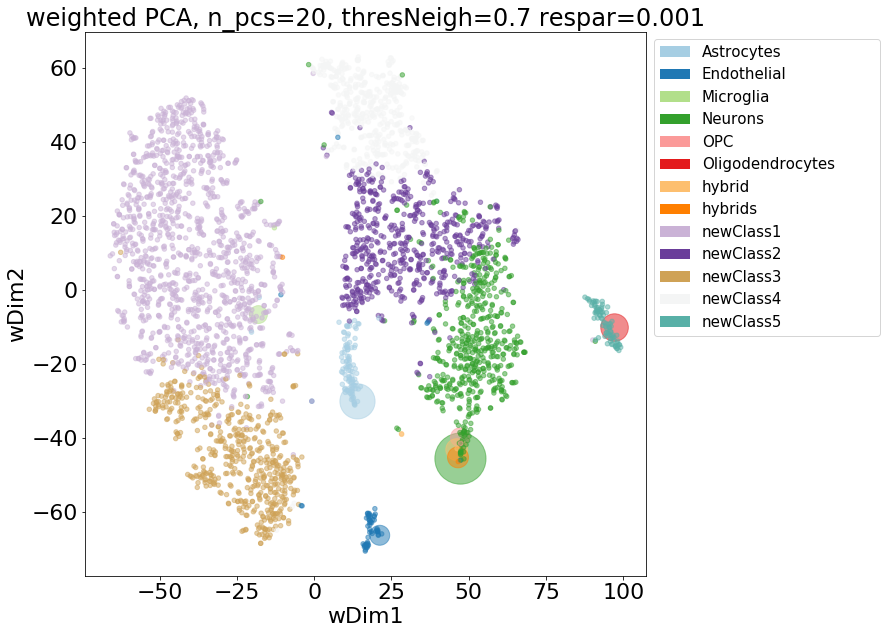

In [20]:
newlut = dict(zip(class_numbersSE,sns.color_palette('Paired', 10)+sns.color_palette('BrBG',len(class_numbers)-9)))
newcolor = tsnedfSE['class'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
tsnedfSE.plot.scatter('wDim1','wDim2',s=weights*20
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,valsSE,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('weighted PCA, n_pcs='+str(n_pcs)+', thresNeigh='+str(thresn)+' respar='+str(respar))
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/semiAnnotateSE_nofetal_selfEdges_tSNE_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')

In [25]:
distance_matrix_num = pd.DataFrame(dm)

In [ ]:
for cell in distance_matrix_num.index:
        valshort = list(distance_matrix_num.loc[cell].sort_values(ascending=True)[1:NNeighbors].values)
        valthresidx = [valshort.index(x) for x in valshort if x>.2]
        inxshort = list(distance_matrix_num.loc[cell].sort_values(ascending=False)[1:NNeighbors].index)
        idxthres = [inxshort[x] for x in valthresidx] # add only pairs with correlation >.2
        indices.append(idxthres)
        values.append(valshort)
        for i in range(len(idxthres)):
            pairs.append((cell,indices[cell][i]))

In [58]:

for x,y in newlut.items():


(0.6509803921568628, 0.807843137254902, 0.8901960784313725)
(0.12156862745098039, 0.47058823529411764, 0.7058823529411765)
(0.6980392156862745, 0.8745098039215686, 0.5411764705882353)
(0.2, 0.6274509803921569, 0.17254901960784313)
(0.984313725490196, 0.6039215686274509, 0.6)
(0.8901960784313725, 0.10196078431372549, 0.10980392156862745)
(0.9921568627450981, 0.7490196078431373, 0.43529411764705883)
(1.0, 0.4980392156862745, 0.0)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.41568627450980394, 0.23921568627450981, 0.6039215686274509)
(0.8129950019223375, 0.635832372164552, 0.33640907343329485)
(0.9572472126105345, 0.9599384851980008, 0.9595540176855056)
(0.346251441753172, 0.6918108419838525, 0.653056516724337)


In [56]:
newcolor
class_numbersSE
valsSE

['Astrocytes',
 'Endothelial',
 'Microglia',
 'Neurons',
 'OPC',
 'Oligodendrocytes',
 'hybrid',
 'hybrids',
 'newClass1',
 'newClass2',
 'newClass3',
 'newClass4',
 'newClass5']

In [21]:
imp.reload(li)

<module 'leidenalgorithm_implementation' from '/home/bojk/Data/minimeta_pyfiles/leidenalgorithm_implementation.py'>

In [26]:
pairs_wSE_80 = li.make_pairs(pd.DataFrame(wdmSE),.2,5)

---------------------------------------
Making list of edges with 80.0% correlation and up
Max 5 edges per cell.
Found 14114 edges.
---------------------------------------


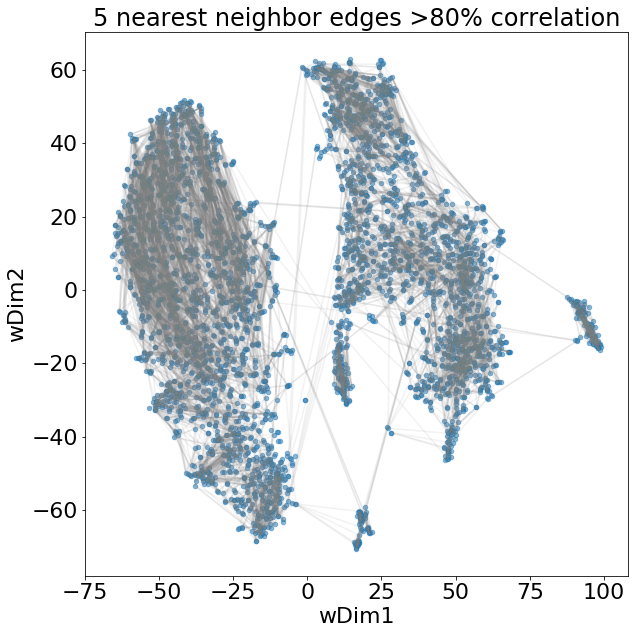

In [27]:
f,ax = plt.subplots()
for pair in pairs_wSE_80:
    xy1 = tsnedfSE.iloc[pair[0]][['wDim1','wDim2']]
    xy2 = tsnedfSE.iloc[pair[1]][['wDim1','wDim2']]
    ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.1
            ,c='gray')

tsnedf.plot.scatter('wDim1','wDim2',figsize=(10,10),ax=ax,alpha=.5)
#plt.yticks([]);plt.xticks([])
plt.title('5 nearest neighbor edges >80% correlation')
plt.gcf().subplots_adjust(right=0.88)
plt.show()
f.savefig('../leidenalg/Datasets/Darmanis_Brain/brain_edges_corr80p.png')

---------------------------------------
Making list of edges with 95.0% correlation and up
Max 5 edges per cell.
Found 9827 edges.
---------------------------------------


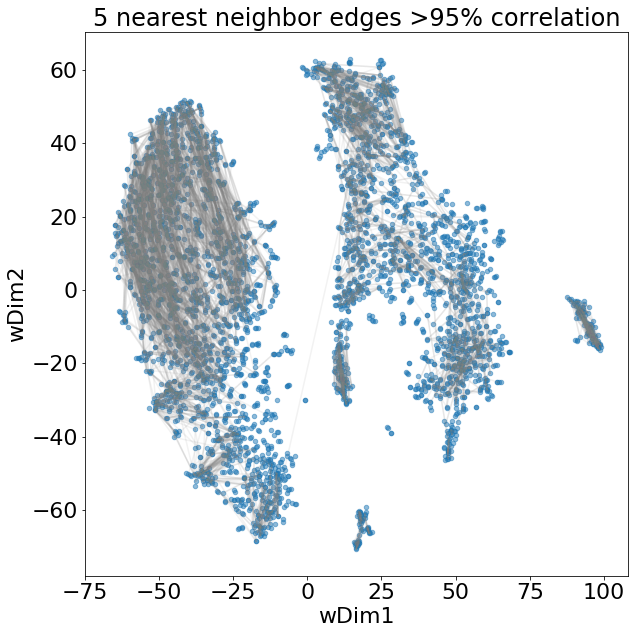

In [29]:
pairs_wSE_95 = li.make_pairs(pd.DataFrame(wdmSE),.05,5)
f,ax = plt.subplots()
for pair in pairs_wSE_95:
    xy1 = tsnedfSE.iloc[pair[0]][['wDim1','wDim2']]
    xy2 = tsnedfSE.iloc[pair[1]][['wDim1','wDim2']]
    ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.1
            ,c='gray')

tsnedf.plot.scatter('wDim1','wDim2',figsize=(10,10),ax=ax,alpha=.5)
#plt.yticks([]);plt.xticks([])
plt.title('5 nearest neighbor edges >95% correlation')
plt.gcf().subplots_adjust(right=0.88)
plt.show()
f.savefig('../leidenalg/Datasets/Darmanis_Brain/brain_edges_corr95p.png')

In [35]:
# plot edge length vs correlation as scatter
# colored by inter or intra class edge 
wdmSEdf = pd.DataFrame(wdmSE)
pairs = li.make_pairs(wdmSEdf,2,5)
pairdf = pd.DataFrame(pairs)
for pair in pairdf.index:
    cell1 = pairdf.loc[pair,0]
    cell2 = pairdf.loc[pair,1]
    class1 = tsnedfSE.iloc[cell1]['new_membership']
    class2 = tsnedfSE.iloc[cell2]['new_membership']
    if class1==class2:
        pairdf.loc[pair,'edge_type'] = 'inter_class'
    else:
        pairdf.loc[pair,'edge_type'] = 'intra_class'
    pairdf.loc[pair,'correlation'] = 1 - wdmSEdf.loc[cell1,cell2]
    pairdf.loc[pair,'distance'] = wdmSEdf.loc[cell1,cell2]
    xy1 = tsnedf.iloc[cell1][['wDim1','wDim2']]
    xy2 = tsnedf.iloc[cell2][['wDim1','wDim2']]
    pairdf.loc[pair,'edge_length'] =  np.sqrt((xy2[0]-xy1[0])**2+(xy2[1]-xy1[1])**2)

---------------------------------------
Making list of edges with -100% correlation and up
Max 5 edges per cell.
Found 14388 edges.
---------------------------------------


In [60]:
pairdf.head()

,0,1,edge_type,correlation,distance,edge_length
0,0,3140,inter_class,0.990079,0.009921,1.318546
1,0,3113,inter_class,0.984644,0.015356,0.044231
2,0,3095,inter_class,0.976665,0.023335,1.266812
3,0,3513,inter_class,0.975294,0.024706,1.184356
4,1,1362,inter_class,0.965174,0.034826,1.259345


In [38]:
pairdf.edge_type.value_counts()

inter_class    13702
intra_class      686
Name: edge_type, dtype: int64

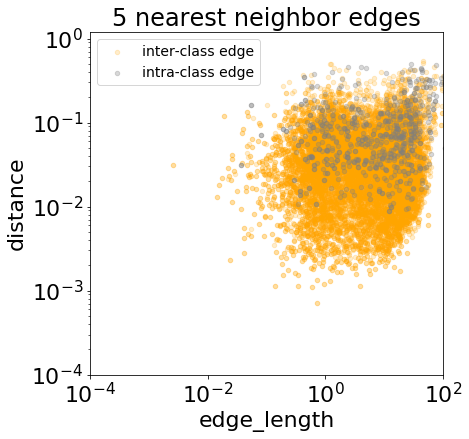

In [48]:
lut = {'inter_class':'orange','intra_class':'gray'}
cols = pairdf['edge_type'].map(lut)
f,ax = plt.subplots()
pairdf[pairdf['edge_type'].str.contains('inter')].plot.scatter('edge_length','distance',alpha=.2,figsize=(7,7),color='orange',label='inter-class edge',ax=ax)
pairdf[pairdf['edge_type'].str.contains('intra')].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color='gray',label='intra-class edge',ax=ax)
plt.yscale('log');plt.xscale('log')
plt.ylim(.0001,1.2)
plt.xlim(.0001,100)
plt.title('5 nearest neighbor edges')
plt.gcf().subplots_adjust(left=0.2,bottom=.2)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/dist_edgelength.png')

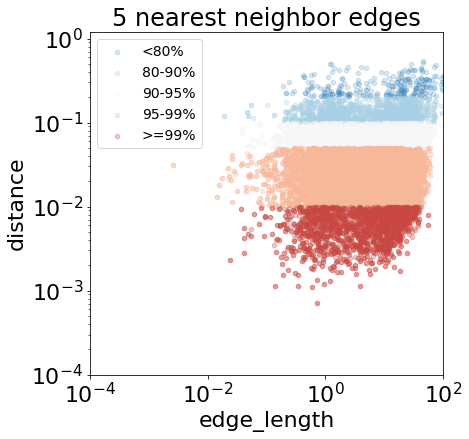

In [52]:
#lut = {'inter_class':'orange','intra_class':'gray'}
#cols = pairdf['edge_type'].map(lut)
colors = sns.color_palette('RdBu_r',5)
f,ax = plt.subplots()
pairdf[pairdf['correlation']<.8].plot.scatter('edge_length','distance',alpha=.2,figsize=(7,7),color=colors[0],label='<80%',ax=ax)
pairdf[(pairdf['correlation']<.9)&(pairdf['correlation']>=.8)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[1],label='80-90%',ax=ax)
pairdf[(pairdf['correlation']<.95)&(pairdf['correlation']>=.9)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[2],label='90-95%',ax=ax)
pairdf[(pairdf['correlation']<.99)&(pairdf['correlation']>=.95)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[3],label='95-99%',ax=ax)
pairdf[pairdf['correlation']>=.99].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[4],label='>=99%',ax=ax)
plt.yscale('log');plt.xscale('log')
plt.ylim(.0001,1.2)
plt.xlim(.0001,100)
plt.title('5 nearest neighbor edges')
plt.gcf().subplots_adjust(left=0.2,bottom=.2)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/dist_edgelength_corrcol.png')

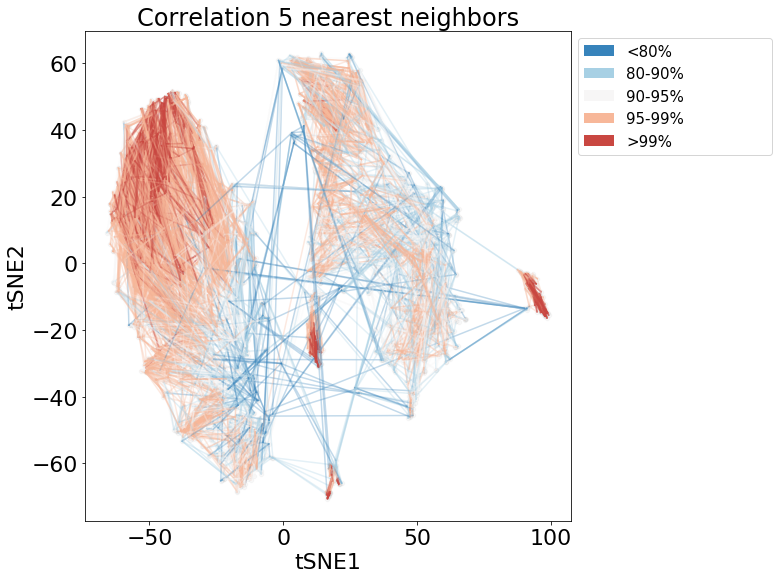

In [71]:
#pairs_wSE_95 = li.make_pairs(pd.DataFrame(wdmSE),.05,5)
f,ax = plt.subplots(figsize=(10,10))
tsnedf.plot.scatter('wDim1','wDim2',figsize=(10,10),ax=ax,alpha=.05,color='gray')
for pair in pairdf.index:
    xy1 = tsnedfSE.iloc[pairdf.loc[pair,0]][['wDim1','wDim2']]
    xy2 = tsnedfSE.iloc[pairdf.loc[pair,1]][['wDim1','wDim2']]
    corr = pairdf.loc[pair,'correlation']
    if corr<.8:
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[0])
    elif (corr>=.8) & (corr<.9):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[1])
    elif (corr>=.9) & (corr<.95):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[2])
    elif (corr>=.95) & (corr<.99):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[3])
    elif corr>=.99:
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[4])
#
#plt.yticks([]);plt.xticks([])
handles = ['<80%','80-90%','90-95%','95-99%','>99%']
labs = [f for f in colors]
dictcorr = dict(zip(handles,labs))
for x,y in dictcorr.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handle, labels = ax.get_legend_handles_labels()
    

plt.xlabel('tSNE1'),plt.ylabel('tSNE2')
plt.title('Correlation 5 nearest neighbors')
plt.legend(handle,handles, bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.gcf().subplots_adjust(right=0.8,bottom=.2)
plt.show()
f.savefig('../leidenalg/Datasets/Darmanis_Brain/brain_edges_corr_tsne.png')

In [94]:
# investigate classification using sankey diagram. first massage data into right format
#tsnedfSE


In [91]:
def rgb_to_hex(list_vals):
    hexval=[]
    for r in list_vals:
        r *=255
        hexval.append('#%02X%02X%02X' % (int(round(r[0]*255)),int(round(r[1]*255)),int(round(r[2]*255))))
    return hexval

from collections import defaultdict

def sankey_BB(dataframe,**kwds):
    """
    necessary keywords:
    left_column, right_column,figure_name,savedir,close_plot
    """
    left_col = kwds['left_column']
    right_col = kwds['right_column']
    figname = kwds['figure_name']
    closePlot = kwds['close_plot']
    savedir = kwds['savedir']
    
    left = dataframe[left_col]
    right = dataframe[right_col]

    leftWeight = None
    rightWeight = None
    leftLabels = None
    rightLabels = None
    rightColor = False
    aspect = 20
    fontsize=20
    #figname = 'spyros_brain_noFetal_sankey_bot'
    figureName = figname

    keys = [str(f) for f in set(list(dataframe[left_col].unique())+list(dataframe[right_col].unique()))]
    keys = list(set(list(dataframe[left_col].unique())+list(dataframe[right_col].unique())))
    values=sns.color_palette('husl',len(keys))
    values_hex = rgb_to_hex(values)
    
    colors = dict(zip(keys,values_hex))
    colors[-1]='gray'
    colorDict = colors

    if leftWeight is None:
        leftWeight = []
    if rightWeight is None:
        rightWeight = []
    if leftLabels is None:
        leftLabels = []
    if rightLabels is None:
        rightLabels = []
    # Check weights
    if len(leftWeight) == 0:
        leftWeight = np.ones(len(left))

    if len(rightWeight) == 0:
        rightWeight = leftWeight

    plt.figure()
    plt.rc('text', usetex=False)
    plt.rc('font', family='serif')

    # Create Dataframe
    if isinstance(left, pd.Series):
        left = left.reset_index(drop=True)
    if isinstance(right, pd.Series):
        right = right.reset_index(drop=True)
    dataFrame = pd.DataFrame({'left': left, 'right': right, 'leftWeight': leftWeight,
                              'rightWeight': rightWeight}, index=range(len(left)))

    if len(dataFrame[(dataFrame.left.isnull()) | (dataFrame.right.isnull())]):
        raise NullsInFrame('Sankey graph does not support null values.')

    # Identify all labels that appear 'left' or 'right'
    allLabels = pd.Series(np.r_[dataFrame.left.unique(), dataFrame.right.unique()]).unique()

    # Identify left labels
    if len(leftLabels) == 0:
        leftLabels = pd.Series(dataFrame.left.unique()).unique()
    else:
        check_data_matches_labels(leftLabels, dataFrame['left'], 'left')

    # Identify right labels
    if len(rightLabels) == 0:
        rightLabels = pd.Series(dataFrame.right.unique()).unique()
    else:
        check_data_matches_labels(leftLabels, dataFrame['right'], 'right')
    # If no colorDict given, make one
    if colorDict is None:
        colorDict = {}
        palette = "hls"
        colorPalette = sns.color_palette(palette, len(allLabels))
        for i, label in enumerate(allLabels):
            colorDict[label] = colorPalette[i]
    else:
        missing = [label for label in allLabels if label not in colorDict.keys()]
        if missing:
            msg = "The colorDict parameter is missing values for the following labels : "
            msg += '{}'.format(', '.join(missing))
            raise ValueError(msg)

    # Determine widths of individual strips
    ns_l = defaultdict()
    ns_r = defaultdict()
    for leftLabel in leftLabels:
        leftDict = {}
        rightDict = {}
        for rightLabel in rightLabels:
            leftDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].leftWeight.sum()
            rightDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].rightWeight.sum()
        ns_l[leftLabel] = leftDict
        ns_r[leftLabel] = rightDict

    # Determine positions of left label patches and total widths
    leftWidths = defaultdict()
    leftLabels[::-1].sort()
    rightLabels[::-1].sort()
    rightLabels = rightLabels[[-1]+list(range(len(rightLabels)-1))]
    for i, leftLabel in enumerate(leftLabels):
        #print(leftLabel)
        myD = {}
        myD['left'] = dataFrame[dataFrame.left == leftLabel].leftWeight.sum()
        if i == 0:
            myD['bottom'] = 0
            myD['top'] = myD['left']
        else:
            myD['bottom'] = leftWidths[leftLabels[i - 1]]['top'] + 0.02 * dataFrame.leftWeight.sum()
            myD['top'] = myD['bottom'] + myD['left']
            topEdge = myD['top']
        leftWidths[leftLabel] = myD

    # Determine positions of right label patches and total widths
    rightWidths = defaultdict()
    for i, rightLabel in enumerate(rightLabels):
        myD = {}
        myD['right'] = dataFrame[dataFrame.right == rightLabel].rightWeight.sum()
        if i == 0:
            myD['bottom'] = 0
            myD['top'] = myD['right']
        else:
            myD['bottom'] = rightWidths[rightLabels[i - 1]]['top'] + 0.02 * dataFrame.rightWeight.sum()
            myD['top'] = myD['bottom'] + myD['right']
            topEdge = myD['top']
        rightWidths[rightLabel] = myD

    # Total vertical extent of diagram
    xMax = topEdge / aspect

    # Draw vertical bars on left and right of each  label's section & print label
    for leftLabel in leftLabels:
        plt.fill_between(
            [-0.02 * xMax, 0],
            2 * [leftWidths[leftLabel]['bottom']],
            2 * [leftWidths[leftLabel]['bottom'] + leftWidths[leftLabel]['left']],
            color=colorDict[leftLabel],
            alpha=0.99
        )
        plt.text(
            -0.05 * xMax,
            leftWidths[leftLabel]['bottom'] + 0.5 * leftWidths[leftLabel]['left'],
            leftLabel,
            {'ha': 'right', 'va': 'center'},
            fontsize=fontsize
        )
    for rightLabel in rightLabels:
        plt.fill_between(
            [xMax, 1.02 * xMax], 2 * [rightWidths[rightLabel]['bottom']],
            2 * [rightWidths[rightLabel]['bottom'] + rightWidths[rightLabel]['right']],
            color=colorDict[rightLabel],
            alpha=0.99
        )
        plt.text(
            1.05 * xMax,
            rightWidths[rightLabel]['bottom'] + 0.5 * rightWidths[rightLabel]['right'],
            rightLabel,
            {'ha': 'left', 'va': 'center'},
            fontsize=fontsize
        )

    # Plot strips
    for leftLabel in leftLabels:
        for rightLabel in rightLabels:
            labelColor = leftLabel
            if rightColor:
                labelColor = rightLabel
            if len(dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)]) > 0:
                # Create array of y values for each strip, half at left value,
                # half at right, convolve
                ys_d = np.array(50 * [leftWidths[leftLabel]['bottom']] + 50 * [rightWidths[rightLabel]['bottom']])
                ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
                ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
                ys_u = np.array(50 * [leftWidths[leftLabel]['bottom'] + ns_l[leftLabel][rightLabel]] + 50 * [rightWidths[rightLabel]['bottom'] + ns_r[leftLabel][rightLabel]])
                ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')
                ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')

                # Update bottom edges at each label so next strip starts at the right place
                leftWidths[leftLabel]['bottom'] += ns_l[leftLabel][rightLabel]
                rightWidths[rightLabel]['bottom'] += ns_r[leftLabel][rightLabel]
                plt.fill_between(
                    np.linspace(0, xMax, len(ys_d)), ys_d, ys_u, alpha=0.65,
                    color=colorDict[labelColor]
                )
    plt.gca().axis('off')
    plt.gcf().set_size_inches(6, 18)
    if figureName != None:
        plt.savefig(savedir+"{}.png".format(figureName), bbox_inches='tight', dpi=150)
        plt.savefig(savedir+"{}.pdf".format(figureName), bbox_inches='tight', dpi=150)
    if closePlot:
        plt.close()

In [90]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','spyros_classification_noFetal_selfEgdes'
        ,'../leidenalg/Datasets/Darmanis_Brain/',True]
kw = dict(zip(keys,valu))
sankey_BB(tsnedfSE[8:],**kw)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701), (0.9707505829046977, 0.4626541987597626, 0.26486329418330007), (0.8369430560927636, 0.5495828952802333, 0.1952683223448124), (0.7350228985632719, 0.5952719904750953, 0.1944419133847522), (0.6430915736746491, 0.6271955086583126, 0.19381135329796756), (0.5310702086647983, 0.6569113639885688, 0.1931838276161326), (0.3126890019504329, 0.6928754610296064, 0.1923704830330379), (0.1998437102815942, 0.6927711055021983, 0.4485948481767363), (0.20582072623426667, 0.6842209016721069, 0.5675558225732941), (0.21044753832183283, 0.6773105080456748, 0.6433941168468681), (0.2151139535594307, 0.6700707833028816, 0.7112365203426209), (0.22126158707091403, 0.6600977737826563, 0.7915486637100363), (0.23299120924703914, 0.639586552066035, 0.9260706093977744), (0.5392573577708815, 0.5821140171749066, 0.9584212824085171), (0.731751635642941, 0.5128186367840487, 0.9581005178234921), (0.9082572436765556, 0.40195790729656516, 0.9576909250290225), (

In [92]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','spyros_classification_noFetal_NoSelfEgdes'
        ,'../leidenalg/Datasets/Darmanis_Brain/',True]
kw = dict(zip(keys,valu))
sankey_BB(tsnedf[8:],**kw)

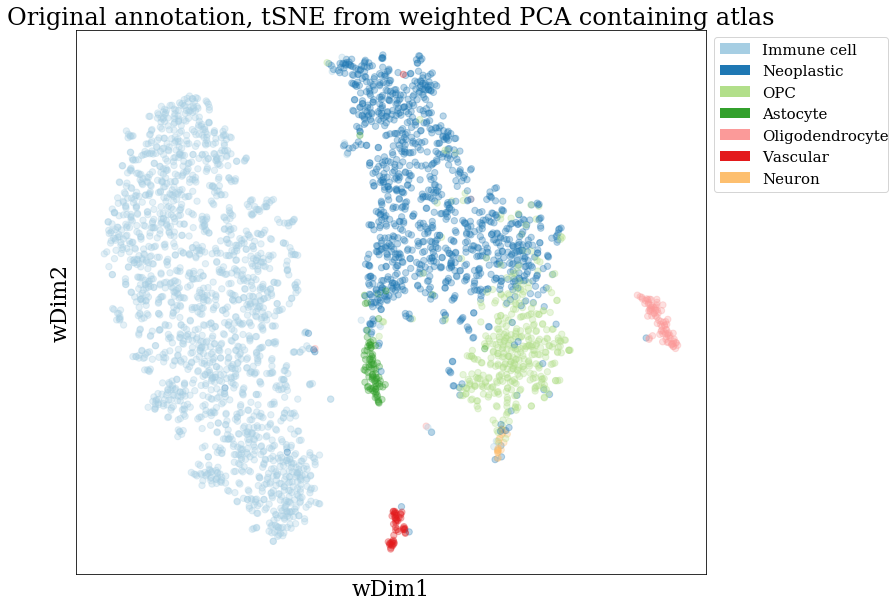

In [95]:
tsnedfSE

keys = list(tsnedfSE[8:].original_membership.value_counts().index); values = sns.color_palette('Paired',len(keys))
lut = dict(zip(keys,values))
colors = tsnedfSE[8:].original_membership.map(lut)

f = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
tsnedfSE[8:].plot.scatter('wDim1','wDim2',ax=ax,color=colors,s=40,alpha=.3)#,label=colors.keys)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Original annotation, tSNE from weighted PCA containing atlas')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.show()
f.savefig('../leidenalg/Datasets/Darmanis_Brain/tSNE_weightedPCA_originalAnnotation.png')